In [1]:
import numpy as np
from sklearn.decomposition import PCA
import sklearn
import kmapper as km
from kmapper.plotlyviz import plotlyviz
import matplotlib.pyplot as plt

In [2]:
topleft_edge_cube=np.array([1,1,1,1,0,0,1,0,0])
left_edge_cube=np.array([1,0,0,1,0,0,1,0,0])
bottomleft_edge_cube=np.array([1,0,0,1,0,0,1,1,1])
topmiddle_edge_cube=np.array([1,1,1,0,0,0,0,0,0])
middle_cube=np.array([0,1,0,1,1,1,0,1,0])
bottommiddle_edge_cube=np.array([0,0,0,0,0,0,1,1,1])
topright_edge_cube=np.array([1,1,1,0,0,1,0,0,1])
right_edge_cube=np.array([0,0,1,0,0,1,0,0,1])
bottomright_edge_cube=np.array([0,0,1,0,0,1,1,1,1])

features=np.stack([topleft_edge_cube,topmiddle_edge_cube,topright_edge_cube,left_edge_cube,middle_cube,right_edge_cube,bottomleft_edge_cube,bottommiddle_edge_cube,bottomright_edge_cube])

In [3]:
filtered_data=np.load('filters/density_filter_epoch1.npy')
gain=3

mapper = km.KeplerMapper(verbose=0)

projected_data = mapper.fit_transform(filtered_data, projection=PCA(n_components=2))

cover = km.Cover(n_cubes=30,perc_overlap=1-1/gain)

graph = mapper.map(projected_data, filtered_data,clusterer=sklearn.cluster.DBSCAN(metric="cosine"), cover=cover)

plotlyviz(graph)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '685736b7-b2ca-42e1-a6b4-72a10671e24d',
              'x': [1.976298426380229, 1.0613760610192524, None, ...,
                    4.673946191211658, 4.132821063439614, None],
              'y': [9.019142822452718, 8.810512947554527, None, ...,
                    -6.853700124516161, -7.028135801793548, None]},
             {'hoverinfo': 'text',
              'marker': {'color': [0.4704691812327507, 0.5492180312787488,
                                   0.5665133394664214, ..., 0.6088623121741797,
                                   0.6539405090463047, 0.662005519779209],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                  

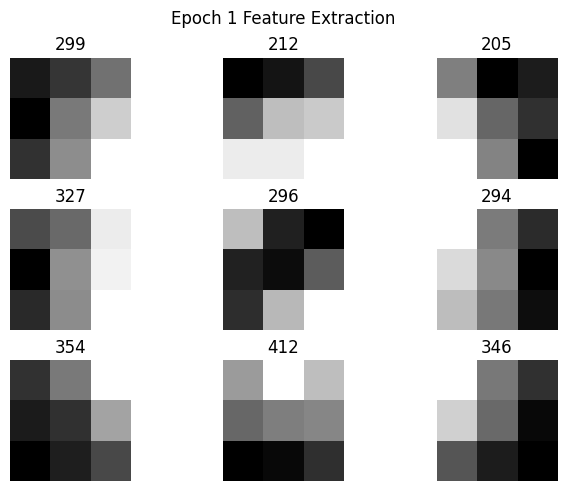

In [4]:
feature_dots=[[] for _ in range(9)]
features_dots_idx=[]
for k in range(465):
    cube=mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data)
    if len(cube)>0:
        cube_mean=np.mean(mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data),axis=0)
        for n in range(9):
            feature_dots[n].append(np.dot(features[n,:],cube_mean)/(np.linalg.norm(features[n,:])*np.linalg.norm(cube_mean)))
        features_dots_idx.append(k)

cubes_to_plot=[features_dots_idx[np.array(dots).argmax()] for dots in feature_dots]

fig,axs=plt.subplots(3,3,layout='constrained')

for ax,cube in zip(axs.flatten(),cubes_to_plot):
    ax.imshow(np.mean(mapper.data_from_cluster_id(f'cube{str(cube)}_cluster0',graph,filtered_data),axis=0).reshape(3,3),cmap='gray_r')
    ax.axis('off')
    ax.set_title(str(cube))

fig.suptitle('Epoch 1 Feature Extraction')
plt.show()

In [5]:
filtered_data=np.load('filters/density_filter_epoch4.npy')
gain=3

mapper = km.KeplerMapper(verbose=0)

projected_data = mapper.fit_transform(filtered_data, projection=PCA(n_components=2))

cover = km.Cover(n_cubes=30,perc_overlap=1-1/gain)

graph = mapper.map(projected_data, filtered_data,clusterer=sklearn.cluster.DBSCAN(metric="cosine"), cover=cover)

plotlyviz(graph)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '80986f58-1e29-4a76-9564-9885ba803605',
              'x': [1.976298426380229, 1.0613760610192524, None, ...,
                    4.673946191211658, 4.132821063439614, None],
              'y': [9.019142822452718, 8.810512947554527, None, ...,
                    -6.853700124516161, -7.028135801793548, None]},
             {'hoverinfo': 'text',
              'marker': {'color': [0.4704691812327507, 0.5492180312787488,
                                   0.5665133394664214, ..., 0.6088623121741797,
                                   0.6539405090463047, 0.662005519779209],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                  

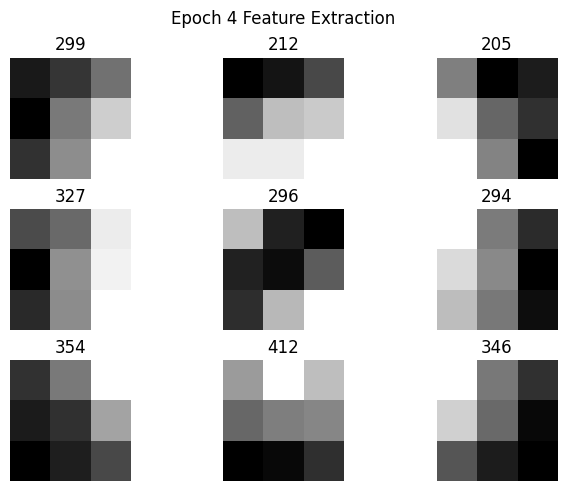

In [6]:
feature_dots=[[] for _ in range(9)]
features_dots_idx=[]
for k in range(465):
    cube=mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data)
    if len(cube)>0:
        cube_mean=np.mean(mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data),axis=0)
        for n in range(9):
            feature_dots[n].append(np.dot(features[n,:],cube_mean)/(np.linalg.norm(features[n,:])*np.linalg.norm(cube_mean)))
        features_dots_idx.append(k)

cubes_to_plot=[features_dots_idx[np.array(dots).argmax()] for dots in feature_dots]

fig,axs=plt.subplots(3,3,layout='constrained')

for ax,cube in zip(axs.flatten(),cubes_to_plot):
    ax.imshow(np.mean(mapper.data_from_cluster_id(f'cube{str(cube)}_cluster0',graph,filtered_data),axis=0).reshape(3,3),cmap='gray_r')
    ax.axis('off')
    ax.set_title(str(cube))

fig.suptitle('Epoch 4 Feature Extraction')
plt.show()

In [9]:
filtered_data=np.load('filters/density_filter_epoch9.npy')
gain=3

mapper = km.KeplerMapper(verbose=0)

projected_data = mapper.fit_transform(filtered_data, projection=PCA(n_components=2))

cover = km.Cover(n_cubes=30,perc_overlap=1-1/gain)

graph = mapper.map(projected_data, filtered_data,clusterer=sklearn.cluster.DBSCAN(metric="cosine"), cover=cover)

plotlyviz(graph)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '262b59b1-2749-4bf0-8922-bd3002ccf6e9',
              'x': [1.976298426380229, 1.0613760610192524, None, ...,
                    4.673946191211658, 4.132821063439614, None],
              'y': [9.019142822452718, 8.810512947554527, None, ...,
                    -6.853700124516161, -7.028135801793548, None]},
             {'hoverinfo': 'text',
              'marker': {'color': [0.4704691812327507, 0.5492180312787488,
                                   0.5665133394664214, ..., 0.6088623121741797,
                                   0.6539405090463047, 0.662005519779209],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                  

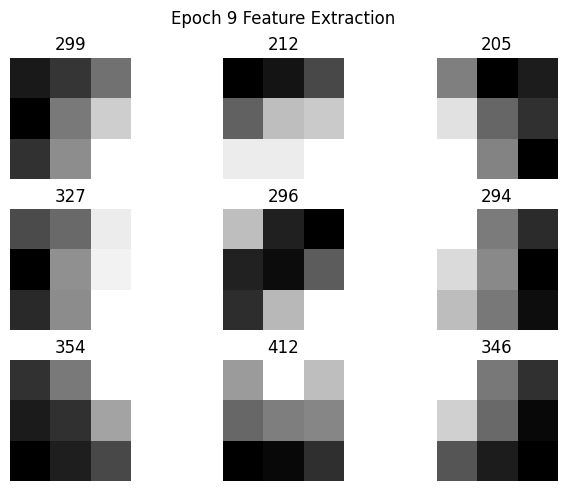

In [10]:
feature_dots=[[] for _ in range(9)]
features_dots_idx=[]
for k in range(465):
    cube=mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data)
    if len(cube)>0:
        cube_mean=np.mean(mapper.data_from_cluster_id(f'cube{k}_cluster0',graph,filtered_data),axis=0)
        for n in range(9):
            feature_dots[n].append(np.dot(features[n,:],cube_mean)/(np.linalg.norm(features[n,:])*np.linalg.norm(cube_mean)))
        features_dots_idx.append(k)

cubes_to_plot=[features_dots_idx[np.array(dots).argmax()] for dots in feature_dots]

fig,axs=plt.subplots(3,3,layout='constrained')

for ax,cube in zip(axs.flatten(),cubes_to_plot):
    ax.imshow(np.mean(mapper.data_from_cluster_id(f'cube{str(cube)}_cluster0',graph,filtered_data),axis=0).reshape(3,3),cmap='gray_r')
    ax.axis('off')
    ax.set_title(str(cube))

fig.suptitle('Epoch 9 Feature Extraction')
plt.show()